# solution to exercise 2.4.10 boston housing

In [3]:
#install some python modules if not installed previously 
#pip install pandas
#pip install seaborn

SyntaxError: invalid syntax (<ipython-input-3-f9a7d24c49d0>, line 3)

In [11]:
# import needed python modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# load data and display
#data = pd.read_csv('Boston.csv', sep=",", skiprows=0, usecols=range(1,14),header='infer')
data = pd.read_csv('Boston.csv')
data
#data.loc[1] # locate the second row
#data.iloc[:,5] # locate the sixth column

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


a) How many rows are in this data set? How many columns? What do the rows and columns represent?\
By examing the data, we notice that it has 506 rows and 13 columns (excluding the index column) with each row as a boston suburb or town (census tract), each colomn as one related housing data such as crime rate, tax, etc.

b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings. \
We can use matrix satter plot or heatmap to get general picutre and pin point some interesting pairs e.g. indus vs nox are linearly correlated. 

<Figure size 2000x1000 with 0 Axes>

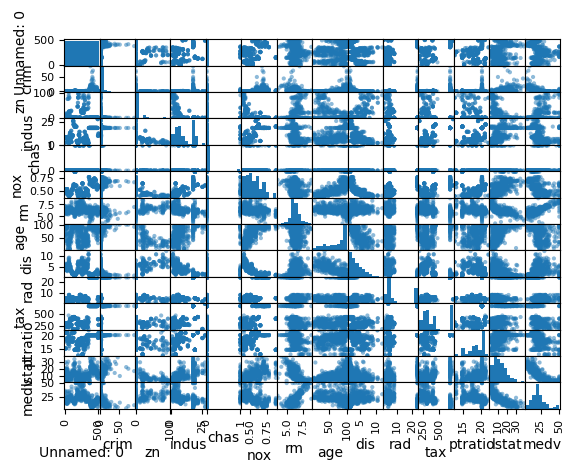

In [13]:
# one plot for all variables 
pd.plotting.scatter_matrix(data)
plt.show()

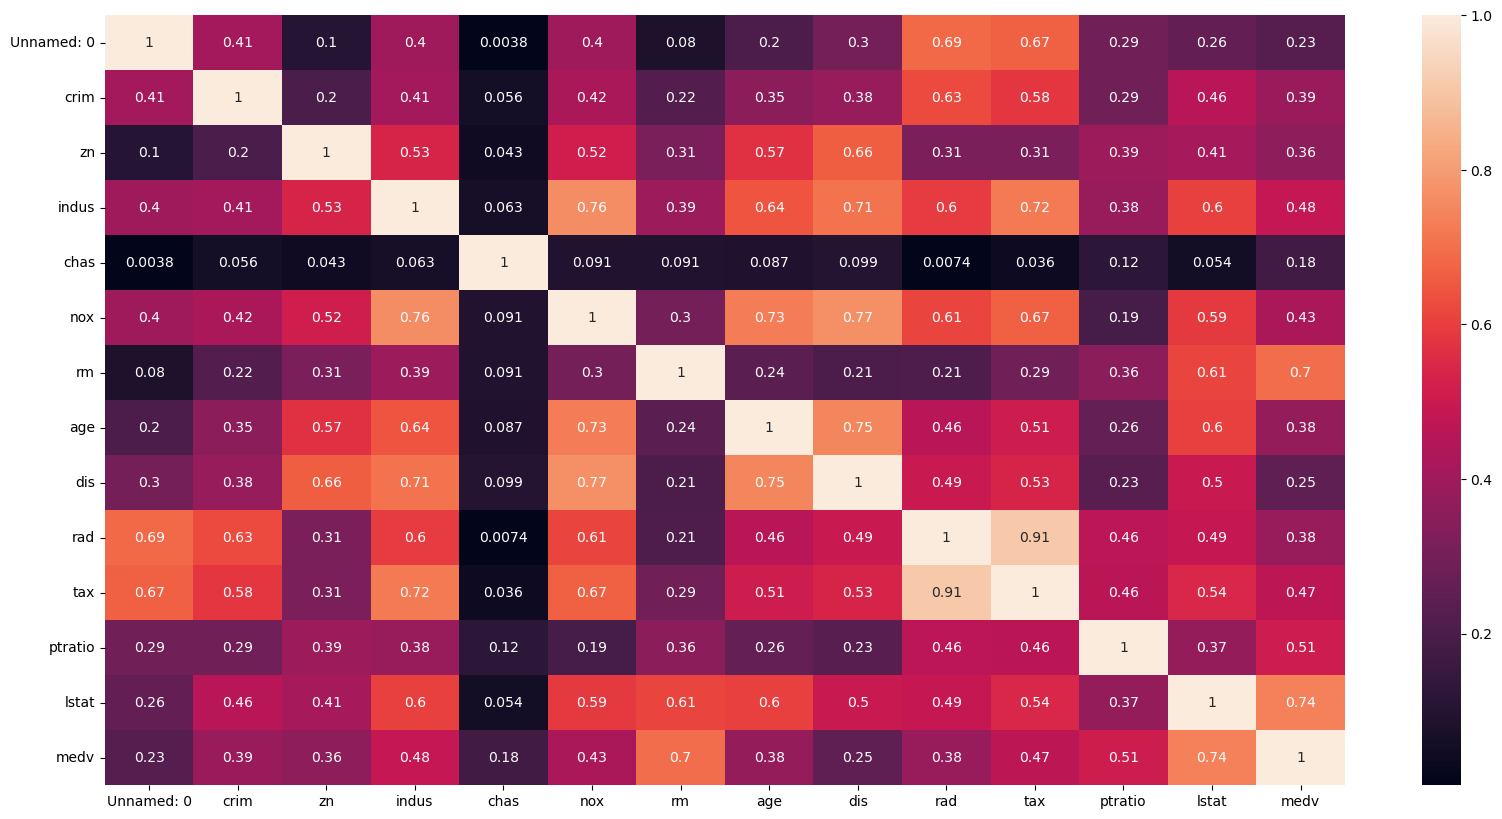

In [17]:
# we can also use heatmap to plot the correlation between two variables 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True)
plt.show()

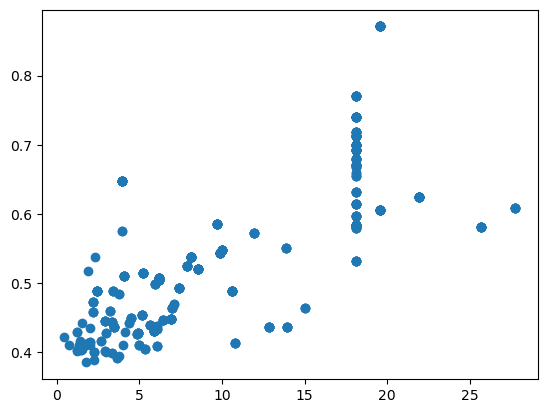

In [18]:
# we can also scatter plot any two picked predictors e.g. 'indus' vs 'nox'
plt.scatter(data.loc[:,'indus'],data.loc[:,'nox'])
plt.show()

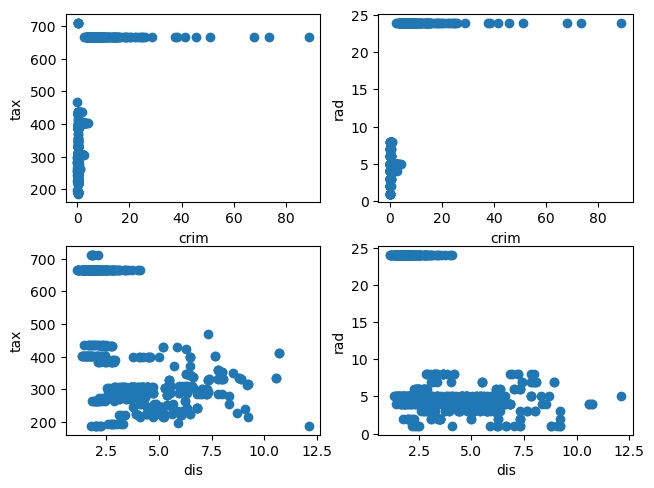

In [19]:
# This is the way to plot several scatter plot at one time
nr=2
nl=2
xlist=['crim','crim','dis','dis']
ylist=['tax','rad','tax','rad' ]
nx=len(xlist)
ny=len(ylist)
fig, axs = plt.subplots(nr,nl)
fig.tight_layout()
for i in range(nr):
    for j in range(nl):
        ij=i*nl+j
        axs[i,j].scatter(data.loc[:,xlist[ij]],data.loc[:,ylist[ij]])
        axs[i,j].set_xlabel(xlist[ij], fontsize=10)
        axs[i,j].set_ylabel(ylist[ij], fontsize=10)
plt.show()

c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.\
Again from the privious heatmap, we can see e.g. crime rate 'crim' is relatively highly correlated to 'rad', index of accessibility to radial high ways and 'tax'. The correlations are positive as seen on the scatter plot above.  

d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.\
We can use box-plot to first get the data distribution of 'crim', 'tax', and 'ptratio' and then filter out these census tracts.\
Tracts 14-18 have high pupil-teacher ratio.
Tracts 489-493 have high tax.
Tract 381 has particularly high crime rates.

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

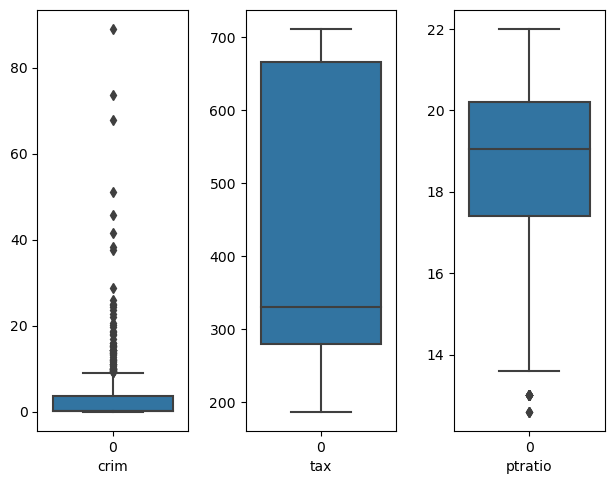

In [20]:
print(data.describe())
nr=1
nl=3
xlist=['crim','tax','ptratio']
fig, axs = plt.subplots(nr,nl)
fig.tight_layout()
for i in range(nr):
    for j in range(nl):
        ij=i*nl+j
        sns.boxplot(data=data[xlist[ij]],  orient='v' , ax=axs[ij])
        axs[ij].set_xlabel(xlist[ij], fontsize=10)
plt.show()
#data.boxplot(column=xlist)

In [21]:
data.loc[data.ptratio > 20.2].head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
13,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26,20.4
14,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,18.2
15,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,8.47,19.9
16,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58,23.1
17,18,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,14.67,17.5


In [22]:
data.loc[data.crim > 80].head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4


In [23]:
data.loc[data.tax > 700].head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
488,489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
489,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
491,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
492,493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


e) How many of the census tracts in this data set bound the Charles river? \
35, use the command below, note this efficient access of data

In [24]:
len(data.loc[data['chas'] == 1])

35

f) What is the median pupil-teacher ratio among the towns in this data set?

In [25]:
print(data.loc[:,'ptratio'].median()) # or use data['ptratio'].median() or data.ptratio.median()
print(data['ptratio'].median())
print(data.ptratio.median())

19.05
19.05
19.05


g) Which census tract of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.\
We first find the census tractors (399 and 406) which has the lowest median value of owner-occupied homes. We then compare the data from these tractors with the description of all data. The conclusion can be drawn based on the comparison.

In [26]:
data[data.medv == data.medv.min()]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [27]:
round(data.describe(),3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,253.500,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.533
std,146.214,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.197
min,1.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000
25%,127.250,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,6.950,17.025
50%,253.500,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200
75%,379.750,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,16.955,25.000
max,506.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,37.970,50.000


h) In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling. \
There are 64 tracts with 7+ rooms per dwelling and 13 tracts with 8+ rooms per dwelling. We can draw conclusion by comparing the statistics of the 13 tracts and that of all tracts. For example, low crim rate (0.72 vs 3.61), low tax (325 vs 408), etc.

In [28]:
print('# of tracts with 7+ rooms = ', len(data.rm[data.rm >7]))
print('# of tracts with 8+ rooms = ', len(data.rm[data.rm >8]))
data.loc[data.rm >8].describe()

# of tracts with 7+ rooms =  64
# of tracts with 8+ rooms =  13


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,232.307692,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,60.915768,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,98.000000,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,225.000000,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,233.000000,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,258.000000,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,365.000000,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
